# Recursions

All matrices described in the paper can be computed explicitly using shenfun. 

All families of orthogonal polynomials $\{Q^{(\alpha,\beta)}_n\}$ based on Jacobi polynomials can be written as

\begin{equation}
    Q^{(\alpha,\beta)}_n(x) = g_n^{(\alpha,\beta)} P^{(\alpha,\beta)}_n(x),
    \label{eq:Qspec}
\end{equation}

where $g_n^{(\alpha,\beta)}$ is a scaling function and $P^{(\alpha,\beta)}_n$ is the regular Jacobi polynomial.

The Jacobi polynomials $\boldsymbol{P}^{(\alpha,\beta)}=(P_0^{(\alpha,\beta)},P_1^{(\alpha,\beta)}, \ldots)^T$ satisfy

\begin{equation}
    x \boldsymbol{P} = (A^{(\alpha,\beta)})^T \boldsymbol{P},
    \label{eq:xP}
\end{equation}

for the tridiagonal matrix $A^{(\alpha,\beta)}$

\begin{align}
    a^{(\alpha,\beta)}_{n-1,n} &= \frac{2(n+\alpha)(n+\beta)}{(2n + \alpha + \beta + 1)(2n +\alpha+\beta)}, \notag \\
    a^{(\alpha,\beta)}_{n,n} &= -\frac{\alpha^2-\beta^2}{(2n + \alpha + \beta + 2)(2n +\alpha+\beta)}, \\
    a^{(\alpha,\beta)}_{n+1,n} &= \frac{2(n+1)(n+\alpha+\beta+1)}{(2n + \alpha + \beta + 2)(2n +\alpha+\beta+1)}\notag.
\end{align}

The specialized polynomials $\boldsymbol{Q}^{(\alpha,\beta)}=(Q^{(\alpha,\beta)}_0, Q^{(\alpha,\beta)}_1, \ldots)^T$ satisfy

\begin{equation}
    x \boldsymbol{Q} = A^T \boldsymbol{Q},
    \label{eq:xQ}
\end{equation}

where $A=(a_{mn})$ and $a_{mn} = (g^{(\alpha,\beta)}_m)^{-1} a^{(\alpha,\beta)}_{mn} g^{(\alpha,\beta)}_n$. We can compute these matrices for pure Jacobi polynomials and specialized polynomials in shenfun.

In [1]:
from shenfun.jacobi.recursions import *

Chebyshev polynomials use $g_n=c_n=1/P^{-1/2,-1/2}_n(1)$, which is imported from [recursions.py](https://github.com/spectralDNS/shenfun/blob/master/shenfun/jacobi/recursions.py). The matrix for Chebyshev has only two nonzero diagonals. With $A \in \mathbb{R}^{6\times 6}$

In [2]:
A = pmat(a, 1, -half, -half, 6, 6, cn)

In [3]:
%matplotlib inline
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
A.diags().toarray() # Note the array does not render on github

array([[ 0.0000,  0.5000,  0.0000,  0.0000,  0.0000,  0.0000],
       [ 1.0000,  0.0000,  0.5000,  0.0000,  0.0000,  0.0000],
       [ 0.0000,  0.5000,  0.0000,  0.5000,  0.0000,  0.0000],
       [ 0.0000,  0.0000,  0.5000,  0.0000,  0.5000,  0.0000],
       [ 0.0000,  0.0000,  0.0000,  0.5000,  0.0000,  0.5000],
       [ 0.0000,  0.0000,  0.0000,  0.0000,  0.5000,  0.0000]])

Legendre polynomials have $g_n=1$

In [4]:
A = pmat(a, 1, 0, 0, 6, 6)
display(A.diags().toarray())

array([[ 0.0000,  0.3333,  0.0000,  0.0000,  0.0000,  0.0000],
       [ 1.0000,  0.0000,  0.4000,  0.0000,  0.0000,  0.0000],
       [ 0.0000,  0.6667,  0.0000,  0.4286,  0.0000,  0.0000],
       [ 0.0000,  0.0000,  0.6000,  0.0000,  0.4444,  0.0000],
       [ 0.0000,  0.0000,  0.0000,  0.5714,  0.0000,  0.4545],
       [ 0.0000,  0.0000,  0.0000,  0.0000,  0.5556,  0.0000]])

We can also get the diagonals directly

In [5]:
a(0, 0, n-1, n)

n/(2*n + 1)

In [6]:
a(0, 0, n+1, n)

(n + 1)/(2*n + 1)

Another recursion is

\begin{equation}
    \partial^{k-l} \boldsymbol{Q} = (B^{l})^T \partial^k \boldsymbol{Q},\label{eq:PBkdP}
\end{equation}

We can compute the matrix $B$, and any matrix power $B^l$. For Chebyshev with $l=2$ we get with $B^2 \in \mathbb{R}^{6\times 6}$

In [7]:
B2 = pmat(b, 2, -half, -half, 6, 6, cn)
display(B2.diags().toarray())

array([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
       [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
       [ 0.2500,  0.0000, -0.1667,  0.0000,  0.0417,  0.0000],
       [ 0.0000,  0.0417,  0.0000, -0.0625,  0.0000,  0.0208],
       [ 0.0000,  0.0000,  0.0208,  0.0000, -0.0333,  0.0000],
       [ 0.0000,  0.0000,  0.0000,  0.0125,  0.0000, -0.0208]])

Another recursion is

\begin{equation}
    x^q \partial^k \boldsymbol{P} = (\underline{A}^q)^T \partial^k \boldsymbol{P}, \label{eq:xdkP}
\end{equation}

where $\underline{A}^{(k,\alpha,\beta)} = (\underline{a}^{(k,\alpha,\beta)}_{mn})_{m,n=0}^{\infty}$  and 

\begin{equation}
    \underline{a}^{(k,\alpha,\beta)}_{m+k,n+k} = (\psi^{(k,\alpha,\beta)}_{m+k})^{-1} a_{mn}^{(\alpha+k,\beta+k)} \psi^{(k,\alpha,\beta)}_{n+k}, \quad \forall \, m,n \ge 0. \label{eq:amn}
\end{equation}

where

\begin{equation}
    \psi_{n}^{(k,\alpha, \beta)} = \frac{(n+\alpha+\beta+1)_k}{2^{k}},
    \label{eq:psin}
\end{equation}

using the Pochhammer symbol $(\alpha)_k=\Gamma(\alpha+k)/\Gamma(\alpha)$.

$\underline{A}^q$ is simply the $q$'th matrix power. To get this matrix in shenfun do (for Chebyshev)

In [15]:
k, q = 2, 1
A = a_mat(a_, k, q, -half, -half, 6, 6, cn)
A.diags().toarray()

array([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
       [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
       [ 0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
       [ 0.0000,  0.0000,  0.1667,  0.0000,  0.8333,  0.0000],
       [ 0.0000,  0.0000,  0.0000,  0.2500,  0.0000,  0.7500],
       [ 0.0000,  0.0000,  0.0000,  0.0000,  0.3000,  0.0000]])

Note that the first two rown and columns are zero.

A main result in the paper is that for test and trial functions $v$ and $u$ (see Sec 4.1.2) we have

\begin{equation}
%(\partial^k u, x^q v)_{\omega} &= \left(X^{(k,q,0)}\right)^T K^T \boldsymbol{\hat{u}},\\
    (\partial^{k-l} u, x^q v)_{\omega} = L^{(k,q,l)} K^T \boldsymbol{\hat{u}}, \label{eq:varmatrix1}
\end{equation}

where $K$ is a stencil matrix and $\boldsymbol{\hat{u}}$ is the vector of unknown expansion coefficients for the solution. The matrix $L^{(k,q,l)}$ can be computed explicitly for any orthogonal basis. For Chebyshev we get

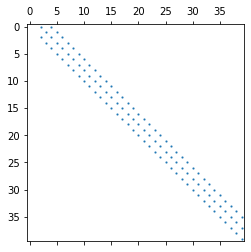

In [9]:
import matplotlib.pyplot as plt
k, q, l = 2, 2, 0
L = Lmat(k, q, l, 40, 40, -half, -half, cn)
plt.spy(L, ms=1)